## ML PROJECT - Survival Of Titanic  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
train_data #train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [4]:
### from knowldge of titanic I know all female, children, and elders should be survivors ###
### let's represent this data

female = train_data[train_data.Sex == "female"]

### have all the female survived?

if (len(female) == len(female[female.Survived == 1])):
    print("Yes, all the female survived")
else:
    print("No")



No


In [5]:
train_data.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

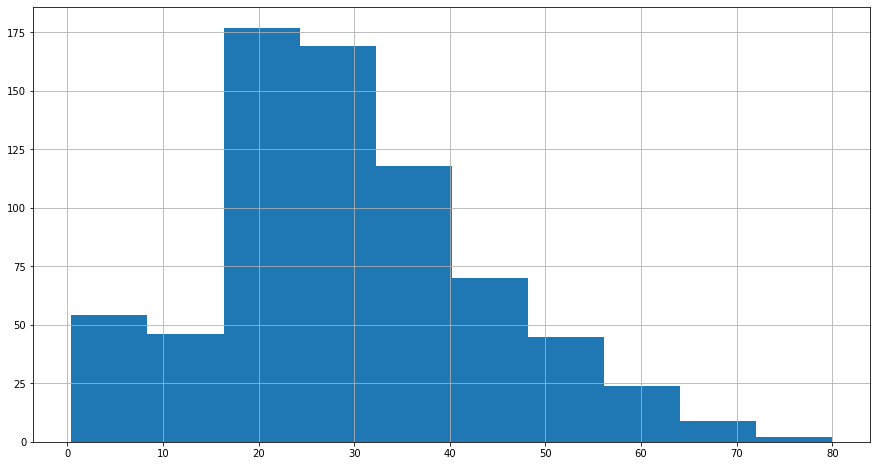

In [6]:
### distribution by age

train_data["Age"].hist(figsize=(15,8))

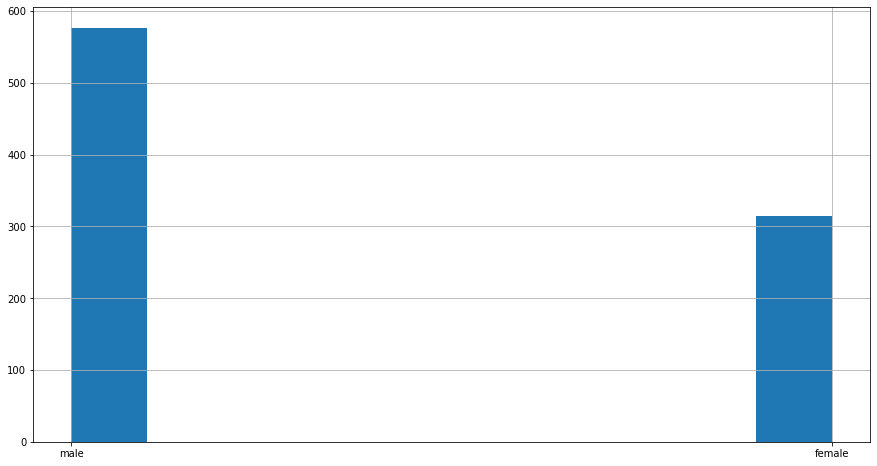

In [7]:
### distribution by sex

train_data["Sex"].hist(figsize=(15,8))

(0.0, 85.0)

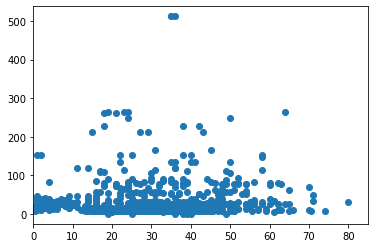

In [8]:
### relationship between age and fare

plt.scatter(train_data.Age,train_data.Fare)
plt.xlim(0,85)

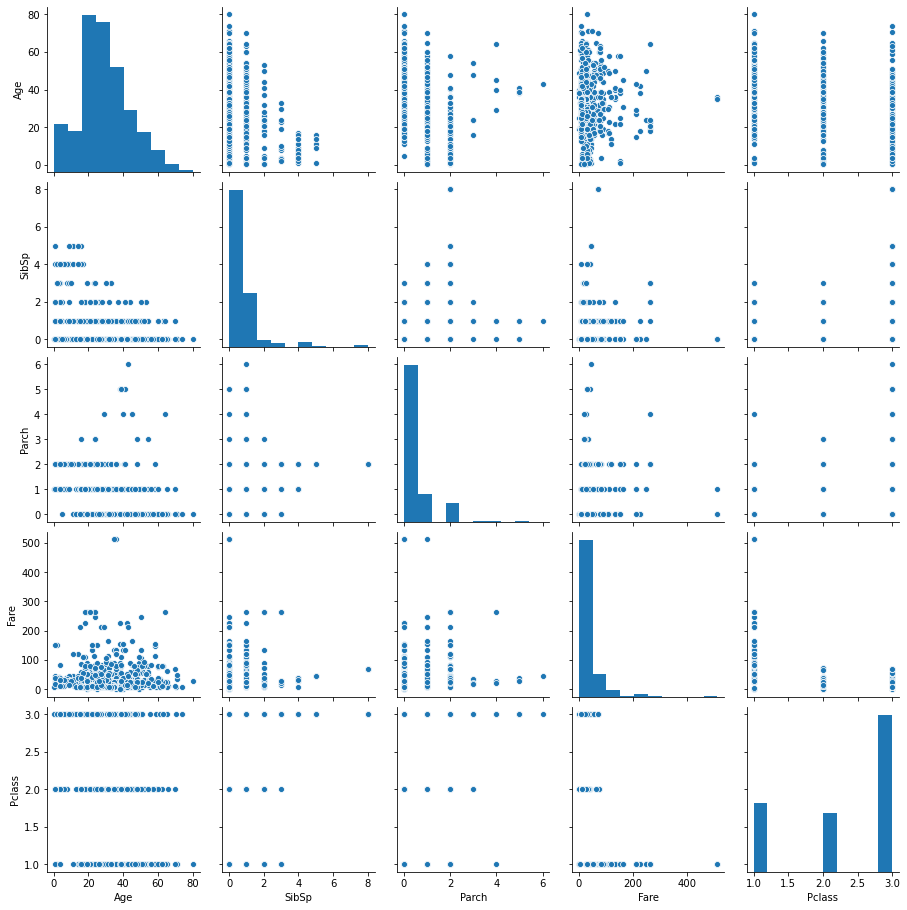

In [9]:
### pariplots between features

sns.pairplot(train_data[["Age","SibSp","Parch","Fare","Pclass","Sex"]])

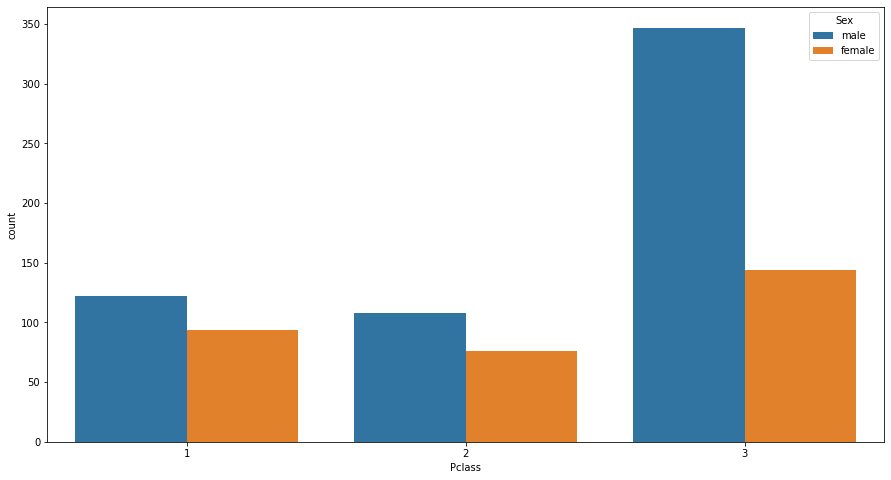

In [10]:
### class seperated by gender

plt.figure(figsize=(15,8))
sns.countplot(x = 'Pclass', data = train_data, hue = "Sex")

In [11]:
test_data = pd.read_csv('test.csv')
test_data #test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Full DataSet

In [12]:
# concatenates both sets

df = [train_data,test_data]
titanic = pd.concat(df)

In [13]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


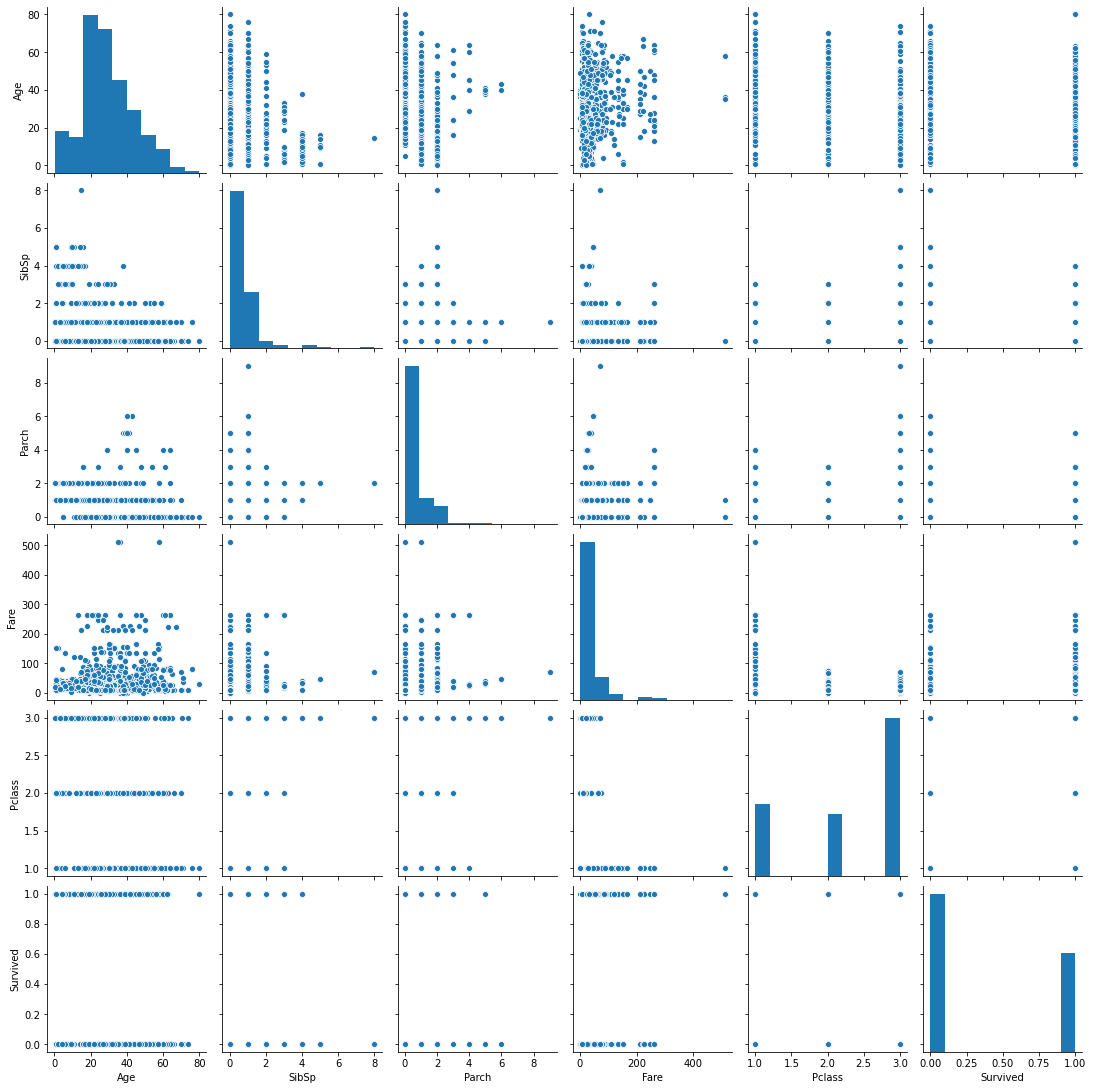

In [15]:
sns.pairplot(titanic[["Age","SibSp","Parch","Fare","Pclass","Survived"]])

In [16]:
### details for numeric data

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
### details for non numeric data

titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


1309


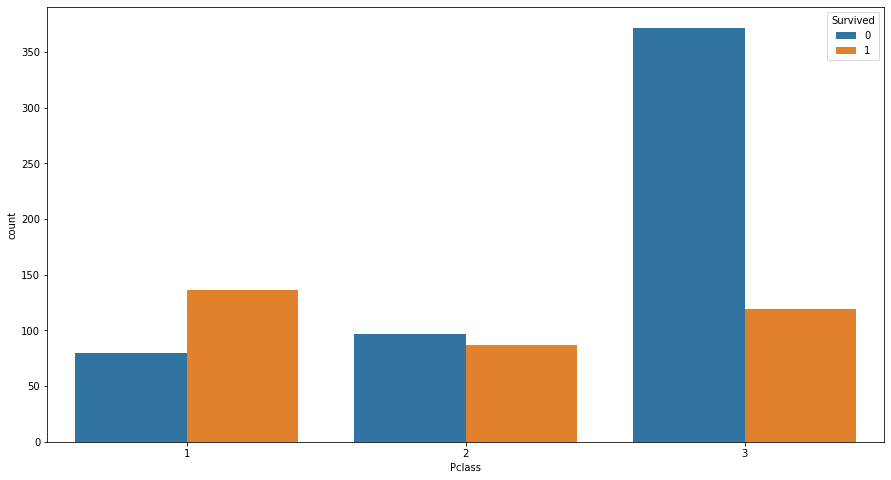

In [18]:
### Class vs survival

plt.figure(figsize=(15,8))
sns.countplot(x = 'Pclass', data = train_data, hue = "Survived")
print(len(titanic.Pclass == 1))

In [19]:
### Amount of people in each class and the ones that survived


for i in range(1,4):
    x = titanic[titanic.Pclass == i]
    print("No of people in class",i," ",len(x))
    print(len(titanic[titanic.Pclass == i])/len(titanic.Pclass))
    print("No of people that survived", len(x[x.Survived == 1]))
    print("% of people that survived",len(x[x.Survived == 1])/len(x))
    print("")

No of people in class 1   323
0.24675324675324675
No of people that survived 136
% of people that survived 0.42105263157894735

No of people in class 2   277
0.21161191749427044
No of people that survived 87
% of people that survived 0.3140794223826715

No of people in class 3   709
0.5416348357524828
No of people that survived 119
% of people that survived 0.16784203102961917



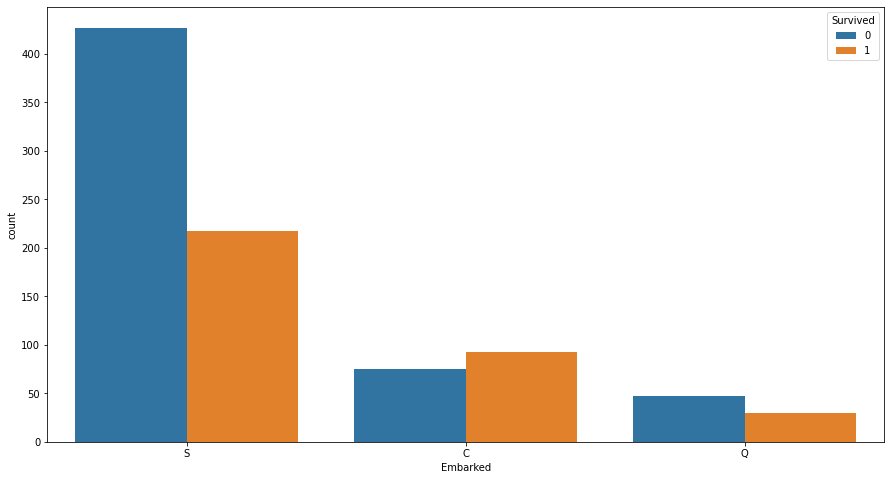

In [20]:
### embark vs survival

plt.figure(figsize=(15,8))
sns.countplot(x = 'Embarked', data = train_data, hue = "Survived")


In [21]:
### mean

train_data["Age"].mean()

29.69911764705882

In [22]:
### checking which training features has missing values

for i in train_data.columns.values:
    count_nan = train_data[i].isna().sum()
    print(i,"missing values", count_nan)

PassengerId missing values 0
Survived missing values 0
Pclass missing values 0
Name missing values 0
Sex missing values 0
Age missing values 177
SibSp missing values 0
Parch missing values 0
Ticket missing values 0
Fare missing values 0
Cabin missing values 687
Embarked missing values 2


In [23]:
train = train_data.drop(['Cabin', 'Ticket'], axis=1)
test = test_data.drop(['Cabin', 'Ticket'], axis=1)
titanic =  titanic.drop(['Cabin', 'Ticket'], axis=1)

In [24]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [25]:
### before dropping the name column you may want to extract the title for each person

train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
### replacing the titles to fit 5 catergories

train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Lady', 'Col','Don','Dona','Dr','Major','Jonkheer','Rev','Sir'], 'Rare')
train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [27]:
### changing title into numeric variables

map_title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(map_title)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [28]:
### drop the name feature now

train = train.drop(['Name','PassengerId'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


In [29]:
### convert the other non-numeric features into numeric

map_sex = {'male': 1 , 'female': 0}
train['Sex'] = train['Sex'].map(map_sex)

map_embark = {'S': 3, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(map_embark)

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,3.0,1
1,1,1,0,38.0,1,0,71.2833,1.0,3
2,1,3,0,26.0,0,0,7.9250,3.0,2
3,1,1,0,35.0,1,0,53.1000,3.0,3
4,0,3,1,35.0,0,0,8.0500,3.0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,3.0,5
887,1,1,0,19.0,0,0,30.0000,3.0,2
888,0,3,0,NaN,1,2,23.4500,3.0,2
889,1,1,1,26.0,0,0,30.0000,1.0,1


In [30]:
### checking missing values again

for i in train.columns.values:
    count_nan = train[i].isna().sum()
    print(i,"missing values", count_nan)

Survived missing values 0
Pclass missing values 0
Sex missing values 0
Age missing values 177
SibSp missing values 0
Parch missing values 0
Fare missing values 0
Embarked missing values 2
Title missing values 0


In [31]:
### need to fill the age variable 
### simple way is to replace nan with average age
train['Age'] = train['Age'].fillna(value=train['Age'].mean())

In [32]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.000000,1,0,7.2500,3.0,1
1,1,1,0,38.000000,1,0,71.2833,1.0,3
2,1,3,0,26.000000,0,0,7.9250,3.0,2
3,1,1,0,35.000000,1,0,53.1000,3.0,3
4,0,3,1,35.000000,0,0,8.0500,3.0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,3.0,5
887,1,1,0,19.000000,0,0,30.0000,3.0,2
888,0,3,0,29.699118,1,2,23.4500,3.0,2
889,1,1,1,26.000000,0,0,30.0000,1.0,1


In [33]:
### filling the embark variable

train['Embarked'] = train['Embarked'].fillna(value=3) ## filling with the most common 



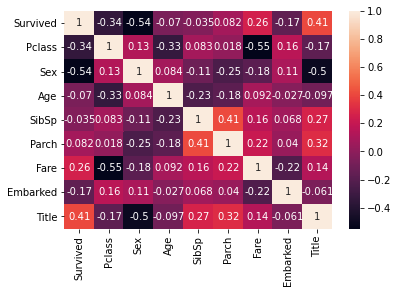

In [34]:
### some heatmaps and plots

sns.heatmap(train.corr(), annot=True)

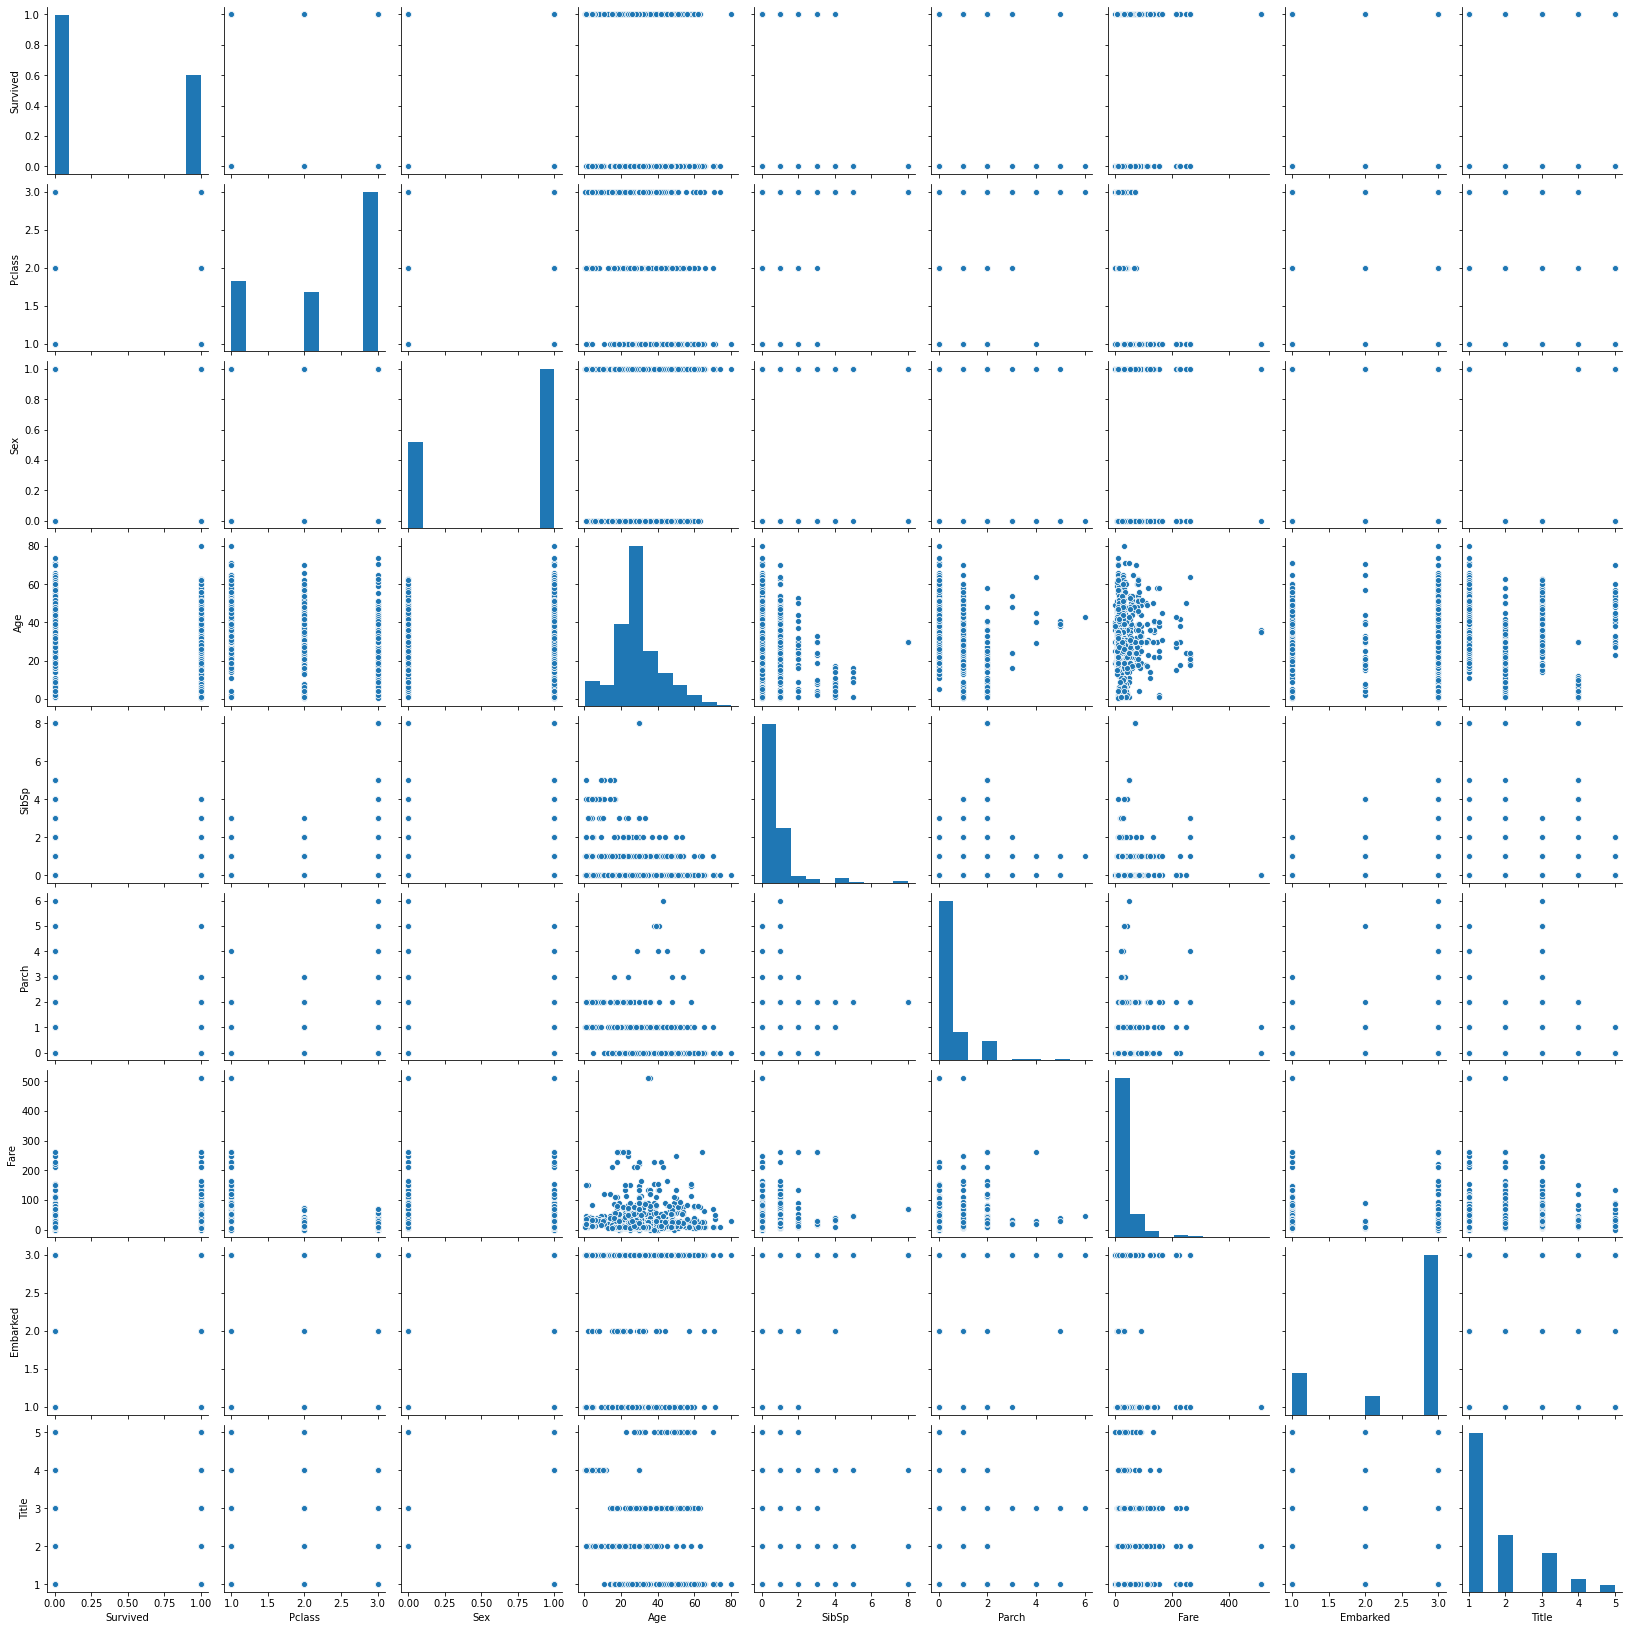

In [35]:
sns.pairplot(train)

In [43]:
####################### ML model #########################

x = train.drop('Survived', axis=1)
y = train["Survived"]
x.to_numpy()

array([[ 3.        ,  1.        , 22.        , ...,  7.25      ,
         3.        ,  1.        ],
       [ 1.        ,  0.        , 38.        , ..., 71.2833    ,
         1.        ,  3.        ],
       [ 3.        ,  0.        , 26.        , ...,  7.925     ,
         3.        ,  2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ..., 23.45      ,
         3.        ,  2.        ],
       [ 1.        ,  1.        , 26.        , ..., 30.        ,
         1.        ,  1.        ],
       [ 3.        ,  1.        , 32.        , ...,  7.75      ,
         2.        ,  1.        ]])

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10)
print(y_train.shape)
print(y_test.shape)

(801,)
(90,)


In [134]:
### function for data partition train-validation-test

def partition(x,y,train_portion = None):
    """ Partitions the data into train-validatin-test. 
    Inputs  - x : the titanic dataset
            - y : the survived columns 
    Outputs - The data splitted in 3 different parts
    
    """

    # Divide the dataset into train, validation and test splits with the respective portions

    ### putting together the data

    if train_portion is None:
        train_portion = 0.8
    else:
        train_portion = train_portion
    
    valid_portion = 0.1
    test_portion = 0.1

    y = y.to_numpy()
    x = x.to_numpy()

    ### randomise the data set
    idx = [i for i in range(len(x))]
    random.shuffle(idx)
    train_idx, valid_idx, test_idx = np.split(idx,[int(train_portion*len(x)), int((train_portion + test_portion)*len(x))])

    X_train = x[train_idx]
    Y_train = y[train_idx]

    X_valid = x[valid_idx]
    Y_valid = y[valid_idx]

    X_test = x[test_idx]
    Y_test = y[test_idx]

    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

In [135]:
### using function to partition the data

X_train, Y_train, X_valid, Y_valid, X_test, Y_test=partition(x,y,train_portion=0.8)

In [186]:
### creating a function for the KNN method 

def KNN_predict(x_train, y_train, test, K):
    'This function uses the K-Nearest Neighbours (kNN) classifier. The function trains the model on the training set'
    'and predicts the survival of the testing set'
    
    # KNN classifier
    my_classifier = KNeighborsClassifier(n_neighbors=K)
    
    # training model
    KNN = my_classifier.fit(x_train,y_train)
      
    # predict
    prediction = my_classifier.predict(test)
    
    return prediction

def KNN_prob(x_train, y_train, test, K):
    "This function uses the K-Nearest Neighbours (kNN) classifier. The function trains the model on the training set"
    "and predicts the probability of survival of the testing set"
    
    # KNN classifier
    my_classifier = KNeighborsClassifier(n_neighbors=K)
    
    # training model
    KNN = my_classifier.fit(x_train,y_train)
      
    # predict
    prediction = my_classifier.predict_proba(test)
    
    return prediction

In [187]:
### creating a function for to find the accuracy 

def accuracy(Y_predict, Y):
    """Function calculates the accuracy of the prediction"""
    assert len(Y) == len(Y_predict)
    correct = sum(Y_predict == Y)
    return correct/len(Y)

In [188]:
K = 5 # default is 5 anyway

y_predict = KNN_predict(X_train, Y_train, X_test, K)
print(y_predict)

y_probs = KNN_prob(X_train, Y_train, X_test, K)
print(y_probs)

# finding accuracy with the function created previously
accuracy(y_predict,Y_test) # using own function

[0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
[[0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.2 0.8]
 [1.  0. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]
 [0.6 0.4]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.  1. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [

0.7777777777777778

In [189]:
### iterating through the different K-neighbour values to find the optimal K parameters for the algortihm

K_values = np.arange(1,21)
accuracy_score = []
for k in K_values: # from K=1 to K=20
    y_predict = KNN_predict(X_train, Y_train, X_test, k)
    accuracy_score.append(accuracy(y_predict,Y_test))

Text(0, 0.5, 'Accuracy')

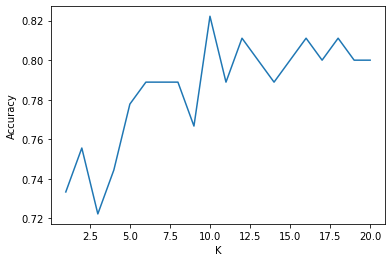

In [190]:
### visualising accuracy score vs K neighbors

plt.plot(K_values, accuracy_score)
plt.xlabel("K")
plt.ylabel("Accuracy")

In [191]:
### confusion matrix evaluation 

def confusion_matrix(Y_predict, Y) :
    #Y = Y.to_numpy()
    K = len(np.unique(Y))
    cm = np.zeros((K,K))
    for i in range(len(Y)):
        cm[Y[i]][Y_predict[i]] += 1 
    return cm

[[58.  6.]
 [12. 14.]]


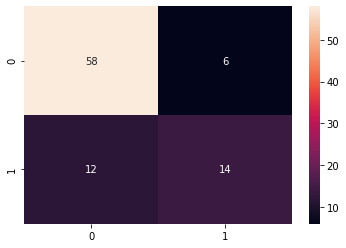

In [192]:
### KNN confusion matrix evaluation for training 

print(confusion_matrix(y_predict, Y_test))
sns.heatmap(confusion_matrix(y_predict, Y_test), annot=True)

Text(0, 0.5, 'Accuracy')

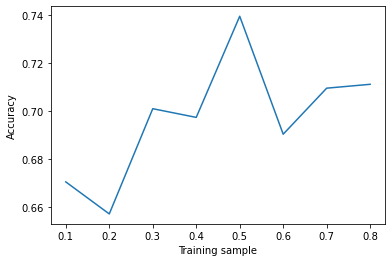

In [193]:
### accuracy vs changing sample size

size = np.arange(0.1,0.9,0.1)
accuracy_score = []
for i in size:
    X_train, Y_train, X_valid, Y_valid, X_test, Y_test=partition(x,y,train_portion=i)
    y_predict = KNN_predict(X_train, Y_train, X_test, 5)
    accuracy_score.append(accuracy(y_predict,Y_test))

# plotting routine
plt.plot(size, accuracy_score)
plt.xlabel("Training sample")
plt.ylabel("Accuracy")

In [194]:
# Other simple metrics

# The ratio of correct positive predictions to the total predicted positives
def precision(cm):
    return cm[1][1]/(cm[1][1] + cm[0][1])

# The ratio of correct positive predictions to the total positives examples (True positive rates)
def recall(cm):
    return cm[1][1]/(cm[1][1] + cm[1][0])
  
# The false positive rate is calculated as the ratio between the number of false positives
# and the total number of actual negative events (regardless of classification)
def false_positive_ratio(cm):
    return cm[0][1]/(cm[0][1] + cm[0][0])

In [195]:
print("Train precision: {}, Train Recall: {}".format(precision(confusion_matrix(y_predict, Y_test)), recall(confusion_matrix(y_predict, Y_test))))

print("False Positives ratio: {}".format(false_positive_ratio(confusion_matrix(y_predict, Y_test))))

Train precision: 0.6176470588235294, Train Recall: 0.6176470588235294
False Positives ratio: 0.23214285714285715


In [196]:
### Expected error evaluation function

def expected_loss(targets, predicts, lossmtx):
    """
    Evaluate how closely predicted values (predict_probs) match the true
    values (targets) in a cross-entropy sense.

    Parameters
    ----------
    targets - the true targets a 1d array of 1s and 0s respectively
        corresponding to class 1 and 0
    predicts - the predictions, a 1d array  of 1s and 0s respectively
        predicting targets of class 1 and 0 
    lossmtx - a matrix (2x2) of loss values for misclassification

    Returns
    -------
    error - An estimate of the expected loss between true and predicted target
    """
    # flatten both arrays and ensure they are array objects
    targets = np.array(targets).flatten()
    predicts = np.array(predicts).flatten()
    class0 = (targets == 0)
    class1 = np.invert(class0)
    predicts0 = (predicts == 0)
    predicts1 = np.invert(predicts0)
    class0loss = lossmtx[0,0]*np.sum(class0 & predicts0) \
        + lossmtx[0,1]*np.sum(class1 & predicts1)
    class1loss = lossmtx[1,0]*np.sum(class0 & predicts0) \
        + lossmtx[1,1]*np.sum(class1 & predicts1)
    N = len(targets)
    error = (class0loss + class1loss)/N
    return error

In [197]:
expected_loss(Y_test, y_predict, confusion_matrix(y_predict, Y_test))

34.68888888888889

In [199]:
### cross entropy loss evaluations function

def cross_entropy_error(targets, predict_probs):
    """
    Evaluate how closely predicted values (predict_probs) match the true
    values (targets) in a cross-entropy sense.

    Parameters
    ----------
    targets - the true targets a 1d array of 1s and 0s respectively
        corresponding to class 1 and 0
    predict_probs - the prediction probabilities, a 1d array of probabilities 
        each predicting the probability of class 1 for the corresponding target

    Returns
    -------
    error - The cross-entropy error between true and predicted target
    """
    # flatted
    targets = np.array(targets).flatten()
    predict_probs = np.array(predict_probs[:,1]).flatten()
    N = len(targets)
    error = - np.sum(targets*np.log(predict_probs) + (1-targets)*np.log(1-predict_probs))/N
    return error

In [200]:
cross_entropy_error(Y_test, y_probs) ## dividing by zero error!!!

<ipython-input-199-13ea23238c61>:23: RuntimeWarning: divide by zero encountered in log
  error = - np.sum(targets*np.log(predict_probs) + (1-targets)*np.log(1-predict_probs))/N
<ipython-input-199-13ea23238c61>:23: RuntimeWarning: invalid value encountered in multiply
  error = - np.sum(targets*np.log(predict_probs) + (1-targets)*np.log(1-predict_probs))/N


nan

In [201]:
### misclassification error function

def misclassification_error(targets, predicts):
    """
    Evaluate how closely predicted values (predict_probs) match the true
    values (targets) in a cross-entropy sense.

    Parameters
    ----------
    targets - the true targets a 1d array of 1s and 0s respectively
        corresponding to class 1 and 0
    predicts - the predictions, a 1d array  of 1s and 0s respectively
        predicting targets of class 1 and 0 

    Returns
    -------
    error - The minimum-misclassification error between true and predicted target
    """
    # flatten both arrays and ensure they are array objects
    targets = np.array(targets).flatten()
    predicts = np.array(predicts).flatten()
    N = targets.size
    error = 1 - np.sum(targets == predicts)/N
    return error

In [202]:
misclassification_error(Y_test, y_predict)

0.28888888888888886

In [205]:
### cross validation from kaggle

def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = random.randrange(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 
    
def kfoldCV(dataset, f=5, k=5, model="logistic"):
    data=cross_validation_split(dataset,f)
    result=[]
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        
        # apply the selected model
        # default is logistic regression
        if model == "logistic":
            # default: alpha=0.1, num_iter=30000
            # if you change alpha or num_iter, adjust the below line         
            c = logistic(cv[:,0:4],cv[:,4],data[i][:,0:4])
            test = c['Y_prediction_test']
        elif model == "knn":
            test = KNN_predict(cv[:,0:4],cv[:,4],data[i][:,0:4],k)
            
        # calculate accuracy    
        acc=(test == data[i][:,4]).sum()
        result.append(acc/len(test))
        
    return result

In [207]:
from statistics import stdev
from statistics import mean

cross_validation_split(x, 5) # partitioning each fold in S = 5 parts
cv_val = kfoldCV(x, f=3, k=5, model="knn") #  3 main folds
print("Result from each fold:", cv_val)
print("Mean:", mean(cv_val))
print("Standard deviation:", stdev(cv_val))

Result from each fold: [0.8249158249158249, 0.7845117845117845, 0.8080808080808081]
Mean: 0.8058361391694725
Standard deviation: 0.02029533257017412


Text(0, 0.5, 'Accuracy')

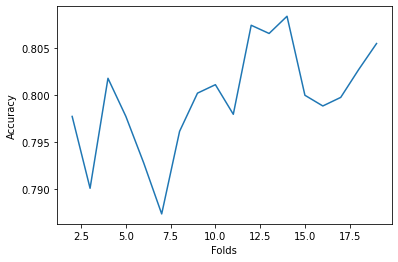

In [208]:
# accuracy vs folds

cross_validation_split(x, 5)
cross_vals = []
folds = np.arange(2,20)
for i in folds:
    
    cv_val = kfoldCV(x, f=i, k=5, model="knn")
    cross_vals.append(mean(cv_val))

# plotting routine
plt.plot(folds, cross_vals)
plt.xlabel("Folds")
plt.ylabel("Accuracy")

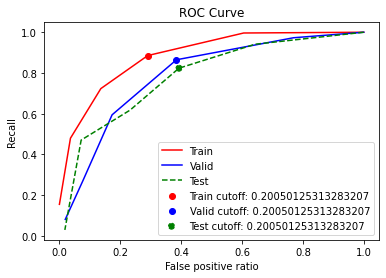

In [222]:
def KNN_threshold(x, threshold=0.5):

    y_probs = KNN_prob(X_train, Y_train, x, K)
    predictions = y_probs >= threshold
    return np.multiply(predictions[:,1],1)

# Define decision thresholds between 0-1
thresholds = np.linspace(0,1, 400)

# Calculate the recall and false positive rate for all the predefined threshold options
def get_roc(x, y):
    tpr = []
    fpr = []
    for threshold in thresholds:
        Y_predict = KNN_threshold(x, threshold=threshold)
        cm = confusion_matrix(Y_predict, y)
        tpr.append(recall(cm))
        fpr.append(false_positive_ratio(cm))
    return fpr, tpr
  
# Get the best cutoff point determining the best threshold and intuitively we want to maximise the true positive rate (recall) and minimise the false positive rate
def get_cutoff(fpr, tpr):
    optimal_idx = np.argmax(np.array(tpr) - np.array(fpr))
    optimal_threshold = thresholds[optimal_idx]
    return optimal_idx, optimal_threshold

train_roc = get_roc(X_train, Y_train)
valid_roc = get_roc(X_valid, Y_valid)
test_roc = get_roc(X_test, Y_test)

train_cutoff = get_cutoff(train_roc[0], train_roc[1])
valid_cutoff = get_cutoff(valid_roc[0], valid_roc[1])
test_cutoff = get_cutoff(test_roc[0], test_roc[1])

plt.plot(train_roc[0], train_roc[1], label="Train", c='r')
plt.plot(valid_roc[0], valid_roc[1], label="Valid", c='b')
plt.plot(test_roc[0], test_roc[1], label="Test", c='g', linestyle='dashed')

plt.scatter(train_roc[0][train_cutoff[0]], train_roc[1][train_cutoff[0]], label="Train cutoff: {}".format(train_cutoff[1]), c='r')
plt.scatter(valid_roc[0][valid_cutoff[0]], valid_roc[1][valid_cutoff[0]], label="Valid cutoff: {}".format(valid_cutoff[1]), c='b')
plt.scatter(test_roc[0][test_cutoff[0]], test_roc[1][test_cutoff[0]], label="Test cutoff: {}".format(test_cutoff[1]), c='g', linestyle='dashed')

plt.title("ROC Curve")
plt.xlabel("False positive ratio")
plt.ylabel("Recall")
plt.legend()